<a href="https://colab.research.google.com/github/jagatabhay/TSAI/blob/master/S13/YoloV3Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sun Jul  5 07:06:57 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
!git clone https://github.com/jagatabhay/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 1337 (delta 18), reused 0 (delta 0), pack-reused 1278
Receiving objects: 100% (1337/1337), 26.24 MiB | 4.49 MiB/s, done.
Resolving deltas: 100% (117/117), done.


In [ ]:
#!git clone https://github.com/jagatabhay/TSAI

In [ ]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.1+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [ ]:
ls

sample_data/  YoloV3/


In [ ]:
cd YoloV3/

/content/YoloV3


In [ ]:
os.makedirs('weights')

In [ ]:
for i in range(201,301):
  os.remove(f'data/customdata/images/img{i}.txt')

In [ ]:
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png   weights


In [ ]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 2 --nosave

Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=2, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-07-05 07:08:17.259454: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1337      0 --:--:-- --:--:-- --:--:--  1337
  0     0    0     0    0     0      0      0 --

In [ ]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 100 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=100, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-07-05 07:09:05.649804: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (500 found, 0 missing, 0 empty, 0 duplicate, for 500 images): 100% 500/500 [00:00<00:00, 9701.99it/s]
Caching images (0.3GB): 100% 500/500 [00:01<00:00, 305.23it/s]
Reading image shapes: 100% 500/500 [00:00<00:00, 4364.48it/s]
Caching labels (500 found, 0 missing,

In [ ]:
os.chdir('/content')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import shutil

for file in os.listdir('gdrive/My Drive/MinionsTest'):
  shutil.move(f'gdrive/My Drive/MinionsTest/{file}','YoloV3/data/customdata/images')

In [ ]:
cd YoloV3/

/content/YoloV3


In [ ]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/1043 data/customdata/images/image-001.png: 320x512 2 minionss, Done. (0.033s)
image 2/1043 data/customdata/images/image-002.png: 320x512 2 minionss, Done. (0.033s)
image 3/1043 data/customdata/images/image-003.png: 320x512 2 minionss, Done. (0.033s)
image 4/1043 data/customdata/images/image-004.png: 320x512 2 minionss, Done. (0.026s)
image 5/1043 data/customdata/images/image-005.png: 320x512 2 minionss, Done. (0.021s)
image 6/1043 data/customdata/images/image-006.png: 320x512 2 minionss, Done. (0.021s)
image 7/104

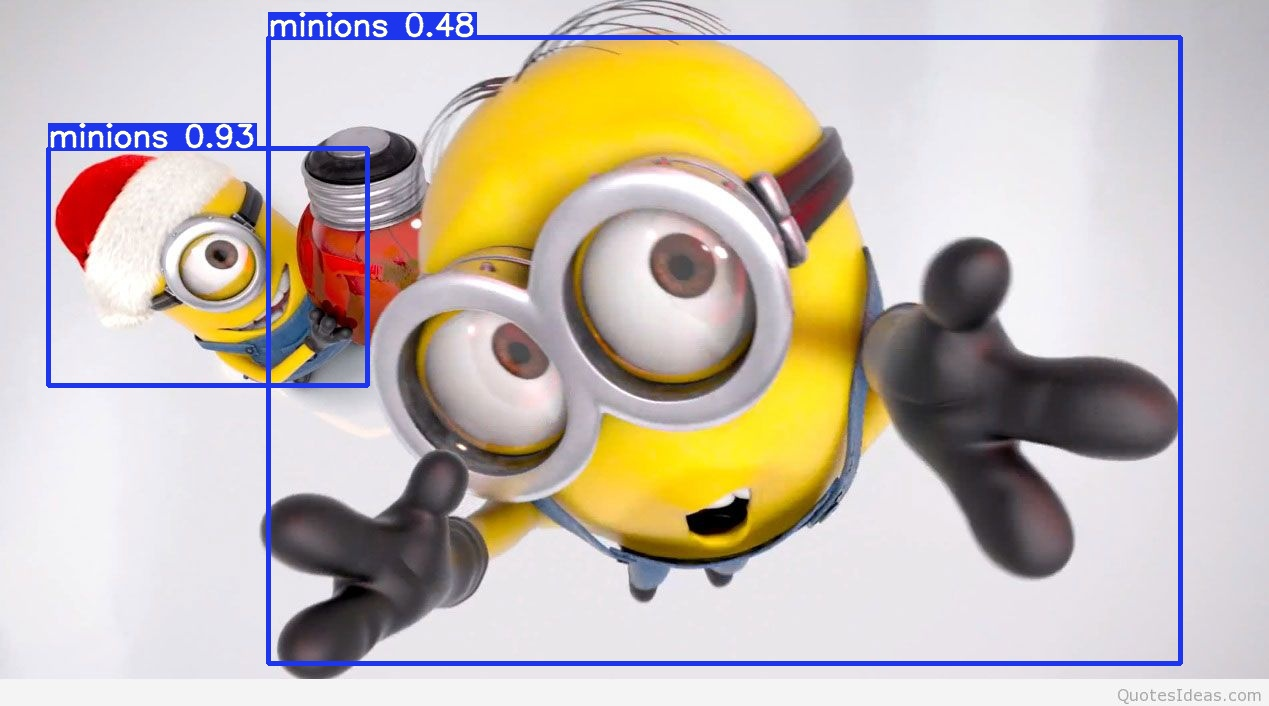

In [ ]:
Image(filename='out_out/img067.jpg', width=600)

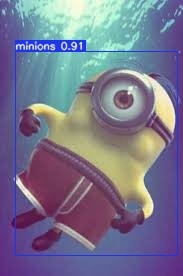

In [ ]:
Image(filename='out_out/img075.jpg', width=600)

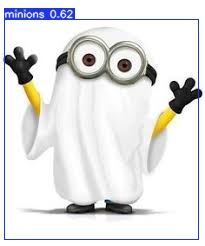

In [ ]:
Image(filename='out_out/img273.jpg', width=600)

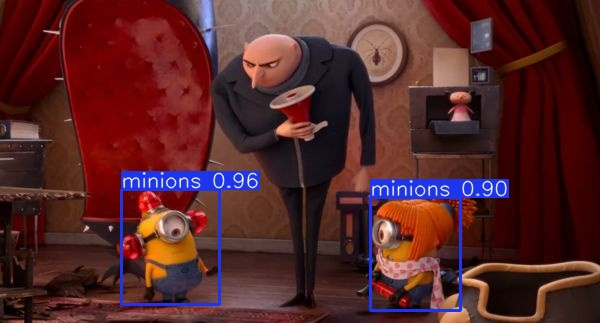

In [ ]:
Image(filename='out_out/img399.jpg', width=600)